In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import xarray as xr
import h5py
from tqdm import tqdm
import time

from RPLB_acc_anySTC import RPLB_acc_anySTC
from RPLB_acc_anySTCApril import RPLB_acc_anySTCApril

In [24]:
c = 2.9979e8
lambda_0 = 1800e-9  # central wavelength
omega_0 = 2*np.pi*c/lambda_0

s = 57.5
tau_FWHM = np.sqrt(2)*s*np.sqrt(2**(2/(s+1))-1)/omega_0
tau_0 = s*np.sqrt(np.exp(2/(s+1))-1)/omega_0

NA = 0.2
half_angle = np.arctan(NA)
a = 2/(np.sin(half_angle)*np.tan(half_angle)*2*np.pi/lambda_0)  # set confocal parameter
w_0 = 2/(np.tan(half_angle)*2*np.pi/lambda_0)  # set beam waist

P = 10e12  # FL power
Psi_0 = np.pi/2
t_0 = -10*tau_0

phi_2 = 0.0*(1e-15)**2  # Group Delay Dispersion s^2
phi_3 = 0.0*(1e-15)**3  # TOD s^3
phi_4 = 0.0*(1e-15)**4  # TOD s^4
spec_phase_coeffs = np.array([phi_2, phi_3, phi_4])

tau_p = 0.0*(1e-15)  # radial group delay s
c_2 = 0.0*(1e-15)**2  # second order LC
LC_coeffs = np.array([tau_p, c_2])

g_0_coeffs = np.array([0.0])

time, temp, temp, KE_final = RPLB_acc_anySTC(lambda_0, tau_0, w_0, P, Psi_0, spec_phase_coeffs, LC_coeffs, g_0_coeffs, t_0, 0.0, 0.0)
time_April, temp, temp, KE_final_April = RPLB_acc_anySTCApril(lambda_0, s, a, P, Psi_0, spec_phase_coeffs, LC_coeffs, g_0_coeffs, t_0, 0.0, 0.0)

print(KE_final[-1])
print(KE_final_April[-1])

23199879.557625704
23110217.649795588


Text(0, 0.5, 'KE (keV)')

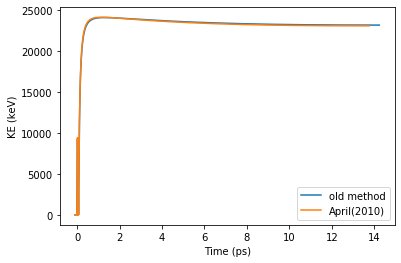

In [25]:
plt.plot(time/1e-12, KE_final/1e3)
plt.plot(time_April/1e-12, KE_final_April/1e3)
plt.legend(['old method', 'April(2010)'], loc=0)
plt.xlabel('Time (ps)')
plt.ylabel('KE (keV)')